# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# IMporting essential Libraries 
import pandas as pd # pandas is for data manipulation and analysis
import numpy as np # numpy is for numerical computations and arrays handling
import matplotlib.pyplot as plt # matplotlib for creating visualizations
import seaborn as sns # seaborn for statistical data visualization m built ,
#on top of matplotlib
import tensorflow as tf # tensorflow for building deep learning models and ,
#neural networks 
import xgboost as xgb # (Extreme Gradient Boosting) (used for classification,
#and regresion problems)
import os # The os module provides functions to interact ,
#with the operating system, allowing tasks like file manipulation,
#@directory navigation, and environment management.
import random # The random module provides functions to generate random numbers,
#and make random selections, useful for tasks like shuffling data or generating,
#random seeds for reproducibility.


# keras-related imports for building CNN
from tensorflow.keras.layers import Input #  Used to define the input layer of a ,
#Keras model, specifying the shape and structure of the data fed into the model.
from tensorflow.keras.layers import SpatialDropout2D #Introduces spatial dropout,
#in convolutional layers by randomly setting entire 2D feature maps to zero, 
#helping with generalization and preventing overfitting.
from tensorflow.keras.regularizers import l2 #Introduces spatial dropout in 
#convolutional layers by randomly setting entire 2D feature maps to zero,
#helping with generalization and preventing overfitting.
from tensorflow.keras.optimizers import Adam #The Adam optimizer combines,
#the benefits of adaptive gradient algorithms to efficiently update model weights,
#during training, balancing learning rate
from tensorflow.keras.models import Sequential # Sequential Model type for linear,
#stack of layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU 
# various layers for CNN: convolution , pooling, dense, etc.
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Used for ,
#real-time data augmentaion
from tensorflow.keras.utils import to_categorical # for one-hot encoding labels
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping # CallBacks to manage learning rate and stop training early 
from sklearn.ensemble import RandomForestClassifier # A machine learning ,
#algorithm used for classification and regression tasks by constructing ,
#multiple decision trees and aggregating their results.
from sklearn.model_selection import RandomizedSearchCV #A technique for,
#hyperparameter tuning that randomly samples parameter combinations to find,
##the best model configuration.
from sklearn.model_selection import train_test_split # for splitting the dataset
#into trianing and test sets 
from sklearn.preprocessing import LabelEncoder # for encoding categorical labels ,
#into numeric format
from sklearn.metrics import confusion_matrix, classification_report # for evaluating,
#model performance (confusion matrix, precision, recall, etc.)
from sklearn.metrics import accuracy_score # Function to compute the accuracy,
#of a model by comparing predicted and actual values.
from sklearn.model_selection import train_test_split # : A function to split,
#the dataset into training and testing subsets for model evaluation and training.
from sklearn.utils.class_weight import compute_class_weight# A function to,
#calculate class weights, often used to address class imbalances in datasets.
from PIL import Image # for image processing (BGR to RGB conversion )
from sklearn.preprocessing import LabelEncoder# A tool to convert categorical,
#labels into numeric form for machine learning algorithms that require ,
#numerical inputs.
from imblearn.over_sampling import SMOTE #Synthetic Minority Over-sampling ,
#Technique (SMOTE) to create synthetic examples for underrepresented classes ,
#to balance class distribution.
from collections import Counter #A Python utility to count the frequency of,
#elements in a collection, useful for examining class distributions or ,
#other counts.
from scipy.stats import randint #: A function to generate random integers ,
#from a specified range, often used in hyperparameter optimization or
#random sampling.
from keras.layers import GlobalAveragePooling2D # A pooling layer that reduces,
#the spatial dimensions of the feature maps by averaging over all values, 
#commonly used in CNN architectures.
from tensorflow.keras.callbacks import Callback #  A base class for creating,
#custom callback functions to be used during training, such as early stopping ,
#or model checkpoints.
from tensorflow.keras.applications import VGG16 # loads the VGG16 model, 
#a popular pre-trained Convolutional Neural Network (CNN) architecture ,
#that was trained on the ImageNet dataset







## Loading the dataset

In [4]:
# loading dataset
df = pd.read_csv('C:\\Users\\Nobody\\Downloads\\school stuff\\Plants Seedling Classification\\Labels.csv')

In [5]:
# loading image .npy file
data = np.load('C:\\Users\\Nobody\\Downloads\\school stuff\\Plants Seedling Classification\\images.npy')

In [6]:
# making a copy of data
df_original= df.copy()
data_original = data.copy()

In [7]:
# making another copy of the data just incase i miss up the copy 
df_copy = df_original.copy()
data_copy = data_original.copy()


In [8]:
# Check the shapes of the original copies
print(f"Original data shape (df_original): {df_original.shape}")
print(f"Original data shape (data_original): {data_original.shape}")


Original data shape (df_original): (4750, 1)
Original data shape (data_original): (4750, 128, 128, 3)


## Data Overview

### Understand the shape of the dataset

In [9]:
# Previewing the first few rows of the dataset , to understand its structure
df.head() # this shows the first few 5 rows of the dataset, 
#including the labels of the plant species

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [10]:
"""
the first five labels in the list are all small-flowered Cranesbill 

"""

'\nthe first five labels in the list are all small-flowered Cranesbill \n\n'

In [11]:
# checking the shape of the dataset to understand its dimensions
print(f"DataFrame shape: {df.shape}") # df.shape returns the dimensions of the,
#dataframe (number of rows, and columns) 
print(f"Image data shape:{data.shape}") # data.shape returns the dimensions of ,
#the image data (number of images, image height, image width, channels)

DataFrame shape: (4750, 1)
Image data shape:(4750, 128, 128, 3)


In [12]:
"""
Dataframe shape means ,there are 4750 images in the dataset. 
The 1 means ,there are is one column in dataframe, and the column contains the,
plant species,names for each of the 4750 images the "Label" column.

Image data shape means, 4750 correponds to the number of images. 
the 128, 128, are the dimensions (height and width) of each image. this time,
each images is 128 pixels by 128 pixels.

3: represents the color channels of the images.  3 channels represent RGB color,
which is one for Red, one for Green, and one for Blue . 

"""

'\nDataframe shape means ,there are 4750 images in the dataset. \nThe 1 means ,there are is one column in dataframe, and the column contains the,\nplant species,names for each of the 4750 images the "Label" column.\n\nImage data shape means, 4750 correponds to the number of images. \nthe 128, 128, are the dimensions (height and width) of each image. this time,\neach images is 128 pixels by 128 pixels.\n\n3: represents the color channels of the images.  3 channels represent RGB color,\nwhich is one for Red, one for Green, and one for Blue . \n\n'

In [13]:
# checking the summary statistics for the dataset
df.describe() #provides count, mean , standard deviation, min , max, and quartiles for numerical columns 

,Label
count,4750
unique,12
top,Loose Silky-bent
freq,654


In [14]:
"""
count: There are 4750 total samples in the dataset.
unique: There are 12 unique labels (plant species) in the dataset.
top: The most frequent label is "Loose Silky-bent".
freq: The label "Loose Silky-bent" appears 654 times in the dataset.

"""

'\ncount: There are 4750 total samples in the dataset.\nunique: There are 12 unique labels (plant species) in the dataset.\ntop: The most frequent label is "Loose Silky-bent".\nfreq: The label "Loose Silky-bent" appears 654 times in the dataset.\n\n'

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [15]:
# understading the data 
df.info() # dataframe information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [16]:
"""
<class 'pandas.core.frame.DataFrame'> tells us its in Panda Dataframe format

RangeIndex: 4750 entries, 0 to 4749: There are 4750 rows,with the index ,
ranging from 0 to 4749. Each row represents one image in the dataset.

Data columns (total 1 columns):There is 1 column in the dataset, 
which is the "Label" column.

In the labels column if you like right, the 4750 non null values, 
tell us that that there is no labels missing 

Dtype :Tells us , that "Label" column is an object. More than likely have text,
that text probably contains the species name 

memory usage: 37.2 kb. Tells us how much memory is being used by the dataframe.
27.2 Kb is not big , kinda small 

"""

'\n<class \'pandas.core.frame.DataFrame\'> tells us its in Panda Dataframe format\n\nRangeIndex: 4750 entries, 0 to 4749: There are 4750 rows,with the index ,\nranging from 0 to 4749. Each row represents one image in the dataset.\n\nData columns (total 1 columns):There is 1 column in the dataset, \nwhich is the "Label" column.\n\nIn the labels column if you like right, the 4750 non null values, \ntell us that that there is no labels missing \n\nDtype :Tells us , that "Label" column is an object. More than likely have text,\nthat text probably contains the species name \n\nmemory usage: 37.2 kb. Tells us how much memory is being used by the dataframe.\n27.2 Kb is not big , kinda small \n\n'

In [17]:
# checks the distribution of the target column
df['Label'].value_counts()

Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

In [18]:
"""



Loose Silky-bent: The most frequent label, with 654 images.
Common Chickweed: Second most common, with 611 images.
Scentless Mayweed: Appears 516 times.
Small-flowered Cranesbill: 496 images.
Fat Hen: 475 images.
Charlock: 390 images.
Sugar beet: 385 images.
Cleavers: 287 images.
Black-grass: 263 images.
Shepherds Purse: 231 images.
Common wheat: 221 images.
Maize: 221 images (tied with Common wheat).



"""

'\n\n\n\nLoose Silky-bent: The most frequent label, with 654 images.\nCommon Chickweed: Second most common, with 611 images.\nScentless Mayweed: Appears 516 times.\nSmall-flowered Cranesbill: 496 images.\nFat Hen: 475 images.\nCharlock: 390 images.\nSugar beet: 385 images.\nCleavers: 287 images.\nBlack-grass: 263 images.\nShepherds Purse: 231 images.\nCommon wheat: 221 images.\nMaize: 221 images (tied with Common wheat).\n\n\n\n'

In [19]:
labels = df['Label'].values # This line converts the "Label" column from,
#the DataFrame into a NumPy array, making it easier to use in ,
#machine learning tasks.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [20]:
categories = df['Label'].unique().tolist() # get all unique labels from label,
#column 

In [21]:

# Function to plot images from different categories
def plot_sample_images(data, df, categories):
    plt.figure(figsize=(15, 10))

    # Loop through the categories
    for i, category in enumerate(categories):
        # Get the indices of all rows where the label matches the category
        indices = df[df['Label'] == category].index

        # Check if there is at least one matching index
        if len(indices) > 0:
            idx = indices[0]  # Get the index of the first match
            print(f"Category: {category}, Index: {idx}")  # Debugging print to check index
            
            # Display the image
            plt.subplot(3, 4, i + 1)
            plt.imshow(data[idx])  # Display the image
            plt.title(category)
            plt.axis('off')
        else:
            print(f"No images found for category {category}")

    plt.tight_layout()  # Ensure subplots don't overlap
    plt.savefig('12SeedlingImages.png')
    plt.show()



In [22]:
"""
the code above is , to display all the plant seedling(baby plant ), images
and categories associated ,with each category . 

"""

'\nthe code above is , to display all the plant seedling(baby plant ), images\nand categories associated ,with each category . \n\n'

Category: Small-flowered Cranesbill, Index: 0
Category: Fat Hen, Index: 496
Category: Shepherds Purse, Index: 971
Category: Common wheat, Index: 1202
Category: Common Chickweed, Index: 1423
Category: Charlock, Index: 2034
Category: Cleavers, Index: 2424
Category: Scentless Mayweed, Index: 2711
Category: Sugar beet, Index: 3227
Category: Maize, Index: 3612
Category: Black-grass, Index: 3833
Category: Loose Silky-bent, Index: 4096


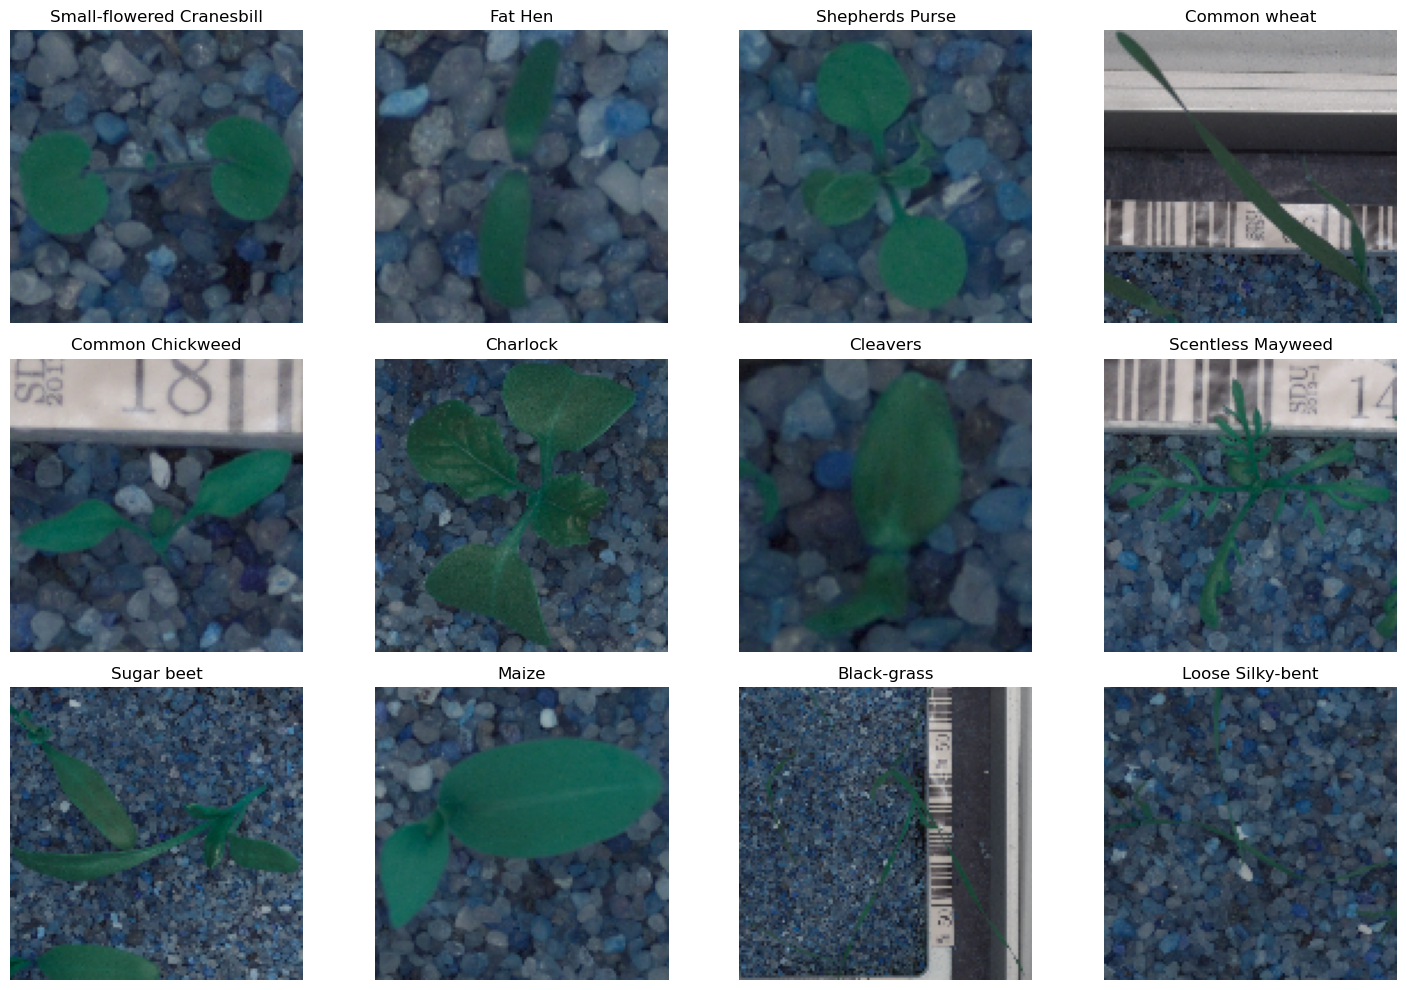

In [23]:
# call function to plot the images
plot_sample_images(data, df, categories)

In [24]:
"""
"A dataset consisting of 12 different plant seedling species, 
each associated with a corresponding category label. 
The task is to build a model that classifies these plant seedlings into their ,
respective species categories based on image data."
"""

'\n"A dataset consisting of 12 different plant seedling species, \neach associated with a corresponding category label. \nThe task is to build a model that classifies these plant seedlings into their ,\nrespective species categories based on image data."\n'

In [25]:
"""
Question 1):
Question : How are these different category plant images different,
from each other?

"""

'\nQuestion 1):\nQuestion : How are these different category plant images different,\nfrom each other?\n\n'

In [26]:
"""
Question 1) 
Answer: The image shows 12 different seedling plants, 
each labeled with its name. Here's an analysis of the differences ,
between each class:

Small-flowered Cranesbill: Has rounded, lobed leaves with a,somewhat circular,
shape. The young leaves appear to have a distinct palmate structure.

Fat Hen: Shows oval to diamond-shaped leaves with slightly wavy margins.
The seedling has an upright growth habit.

Shepherds Purse: Features rounded, somewhat heart-shaped cotyledons (seed leaves)

that form a rosette pattern.

Common Wheat: Appears as a thin, grass-like seedling with long, narrow leaves ,
growing upright.

Common Chickweed: Has small, oval to elliptical opposite leaves with pointed tips.


Charlock: Displays broader leaves with a more pronounced lobe at the end and ,
possibly some indentation along the margins.

Cleavers: Shows whorled leaves (arranged in a circular pattern around the stem) '
that appear to have an elongated shape.

Scentless Mayweed: Has finely divided, feathery foliage that looks almost ,
fern-like, more complex than most other seedlings shown.

Sugar Beet: Displays oval to paddle-shaped cotyledons with a longer stem than some others.

Maize: Has much broader, elongated leaves compared to other seedlings, showing the beginning of the typical corn leaf structure.

Black-grass: Shows very narrow, grass-like leaves similar to wheat but with subtle differences in growth habit.

Loose Silky-bent: Another grass-type seedling, but appears to have a different growth pattern from black-grass and wheat.
"""

"\nQuestion 1) \nAnswer: The image shows 12 different seedling plants, \neach labeled with its name. Here's an analysis of the differences ,\nbetween each class:\n\nSmall-flowered Cranesbill: Has rounded, lobed leaves with a,somewhat circular,\nshape. The young leaves appear to have a distinct palmate structure.\n\nFat Hen: Shows oval to diamond-shaped leaves with slightly wavy margins.\nThe seedling has an upright growth habit.\n\nShepherds Purse: Features rounded, somewhat heart-shaped cotyledons (seed leaves)\n\nthat form a rosette pattern.\n\nCommon Wheat: Appears as a thin, grass-like seedling with long, narrow leaves ,\ngrowing upright.\n\nCommon Chickweed: Has small, oval to elliptical opposite leaves with pointed tips.\n\n\nCharlock: Displays broader leaves with a more pronounced lobe at the end and ,\npossibly some indentation along the margins.\n\nCleavers: Shows whorled leaves (arranged in a circular pattern around the stem) '\nthat appear to have an elongated shape.\n\nScen

In [27]:


# Check the shape and some sample data
print(f"Labels shape: {df.shape}")
print(f"Sample labels: {df.iloc[0 ]}")


Labels shape: (4750, 1)
Sample labels: Label    Small-flowered Cranesbill
Name: 0, dtype: object


In [28]:
"""

This code prints the shape of the DataFrame and shows the first sample label, 
"Small-flowered Cranesbill," to verify the structure and content of the labels.







"""

'\n\nThis code prints the shape of the DataFrame and shows the first sample label, \n"Small-flowered Cranesbill," to verify the structure and content of the labels.\n\n\n\n\n\n\n\n'

In [29]:
# Image Shape Check (Consistency of Image Dimensions)
print(f"Shape of the first image: {data[0].shape}")

Shape of the first image: (128, 128, 3)


In [30]:
"""

This code checks the shape of the first image in the dataset to ensur,
consistency in image dimensions. It confirms that the image is 128x128 pixels,
with 3 color channels (RGB).
""" 

'\n\nThis code checks the shape of the first image in the dataset to ensur,\nconsistency in image dimensions. It confirms that the image is 128x128 pixels,\nwith 3 color channels (RGB).\n'

In [31]:
print(f"Labels length: {len(labels)}")
print(f"Images length: {data.shape[0]}")

Labels length: 4750
Images length: 4750


In [32]:
"""
This cell confirms that the number of labels and the number of images match, 
ensuring consistency between the labels and the corresponding images. 
Both the labels and images have 4750 entries, which indicates that each image
has a corresponding label.

"""

'\nThis cell confirms that the number of labels and the number of images match, \nensuring consistency between the labels and the corresponding images. \nBoth the labels and images have 4750 entries, which indicates that each image\nhas a corresponding label.\n\n'

In [33]:
# lets check for missising values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Label    0
dtype: int64


In [34]:
"""
This cell checks for missing values in the dataset. 
The output shows that there are no missing values in the "Label" column,
confirming that all 4750 entries in the dataset are complete and we don't need,
to handle any missing data for the labels.

"""

'\nThis cell checks for missing values in the dataset. \nThe output shows that there are no missing values in the "Label" column,\nconfirming that all 4750 entries in the dataset are complete and we don\'t need,\nto handle any missing data for the labels.\n\n'

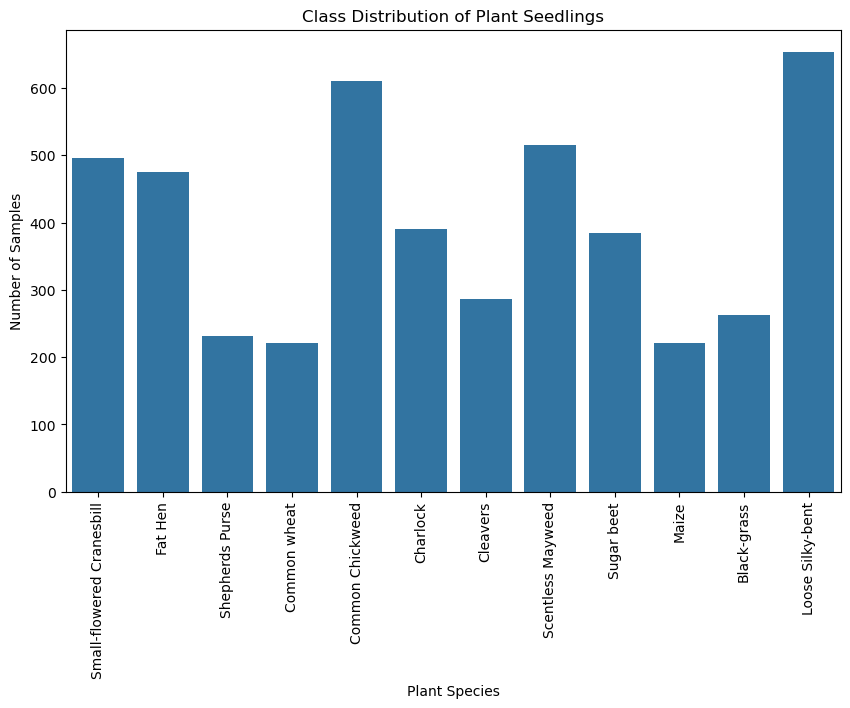

In [35]:
# LEts look at the Label Disdtribution (Class Balance)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Label', dodge=False)
plt.title("Class Distribution of Plant Seedlings")
plt.xlabel('Plant Species')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.savefig('ClassDistributionPlantSeedlings.png')
plt.show()

In [36]:
"""
Question 2: Is the dataset provided an imbalance? (Check with using bar plots)
"""

'\nQuestion 2: Is the dataset provided an imbalance? (Check with using bar plots)\n'

In [37]:
"""
The dataset contains 12 distinct plant species, with varying sample sizes for each category.
The largest class is Loose Silky-bent with 654 samples, while the smallest categories like Maize and Shepherd's Purse have around 220-230 samples.
Class imbalance is noticeable, with certain species having significantly more samples than others (e.g., Loose Silky-bent vs. Maize).
This imbalance may require special handling during model training (e.g., class weighting, data augmentation, or SMOTE techniques) to prevent the model from being biased towards the larger classes.
Understanding this distribution is important for ensuring that the model generalizes well across all species.

"""

"\nThe dataset contains 12 distinct plant species, with varying sample sizes for each category.\nThe largest class is Loose Silky-bent with 654 samples, while the smallest categories like Maize and Shepherd's Purse have around 220-230 samples.\nClass imbalance is noticeable, with certain species having significantly more samples than others (e.g., Loose Silky-bent vs. Maize).\nThis imbalance may require special handling during model training (e.g., class weighting, data augmentation, or SMOTE techniques) to prevent the model from being biased towards the larger classes.\nUnderstanding this distribution is important for ensuring that the model generalizes well across all species.\n\n"

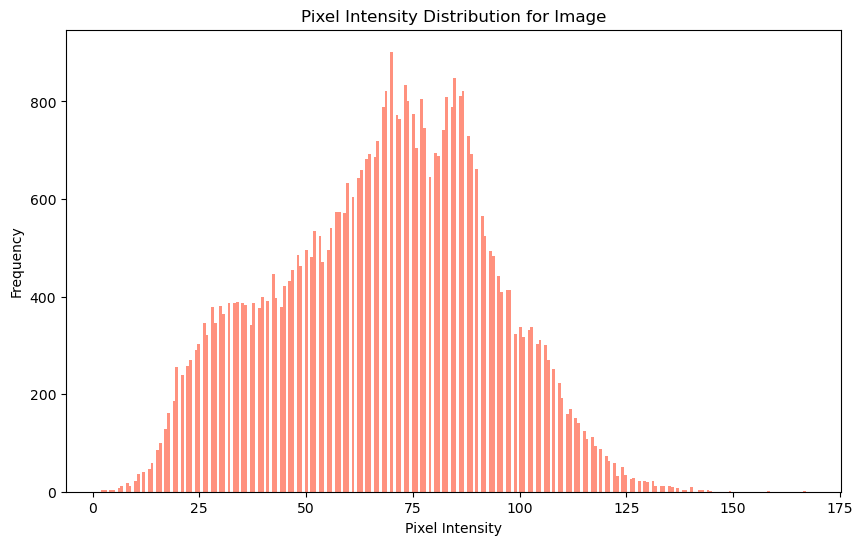

In [38]:
# Pixel Intensity Histogram
plt.figure(figsize=(10,6))
plt.hist(data[0].flatten(), bins=256, color='#FF6347', alpha=0.7)
plt.title("Pixel Intensity Distribution for Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.savefig('PixelIntensityDistributionImage.png')
plt.show()

In [39]:
"""
from the pixel intensity Distribution shows us: 
The x-axis represents pixel intensity values ranging from ,
approximately 0 to 175.
The y-axis shows frequency (count of pixels) ranging from 0 to about 900
The distribution forms an approximately bell-shaped curve (normal distribution)
Peak intensity appears around 70-80 on the scale.
The highest frequency bars reach approximately 850-900 counts
The distribution is slightly skewed toward lower intensity values
Most pixel values fall between intensity values of 25 and 125
Very few pixels have intensity values below 10 or above 150
The histogram uses salmon/light red colored bars

"""

'\nfrom the pixel intensity Distribution shows us: \nThe x-axis represents pixel intensity values ranging from ,\napproximately 0 to 175.\nThe y-axis shows frequency (count of pixels) ranging from 0 to about 900\nThe distribution forms an approximately bell-shaped curve (normal distribution)\nPeak intensity appears around 70-80 on the scale.\nThe highest frequency bars reach approximately 850-900 counts\nThe distribution is slightly skewed toward lower intensity values\nMost pixel values fall between intensity values of 25 and 125\nVery few pixels have intensity values below 10 or above 150\nThe histogram uses salmon/light red colored bars\n\n'

In [40]:
# Duplicate Check 
duplicates = df[df.duplicated(subset='Label', keep=False)]
print("\nDuplicates (if any):")
print(duplicates)


Duplicates (if any):
                          Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]


In [41]:
"""
 Check for duplicates based solely on the 'Label' column.
The output lists all rows because every label is repeated multiple times ,
across the dataset, as we have multiple images per class.
No actual duplicates were found in this case.


"""

"\n Check for duplicates based solely on the 'Label' column.\nThe output lists all rows because every label is repeated multiple times ,\nacross the dataset, as we have multiple images per class.\nNo actual duplicates were found in this case.\n\n\n"

In [42]:
# creating the label counts variable
label_counts = df['Label'].value_counts()

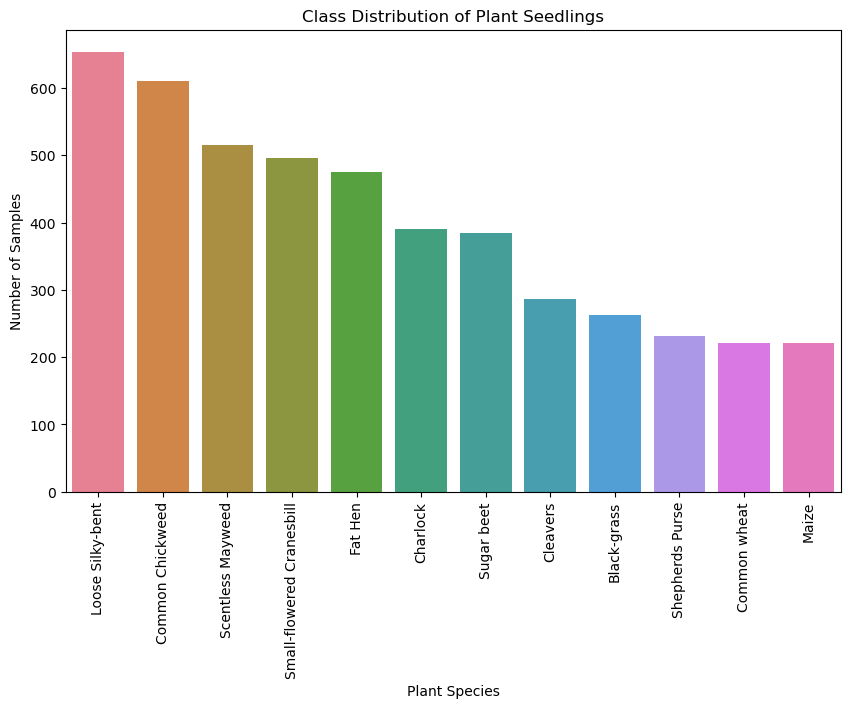

In [43]:
# plotting the class distribution as a barplot
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, dodge=False)
plt.title('Class Distribution of Plant Seedlings')
plt.xlabel('Plant Species')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.legend([],[], frameon=False)
plt.savefig('ClassDistribution.png')
plt.show()

In [44]:
"""
better visualization of class distribution with color 
"""

'\nbetter visualization of class distribution with color \n'

## Data Pre-Processing

In [45]:
# setting  the labels as my Y 
y= df['Label'].values # this will give us the plant labels as a numpy array 

In [46]:
# setting my images as X 
X = data 

In [47]:
# # Checking the shape of the features (X) and labels (y) ,
#to ensure data is correctly loaded


print(f"X shape: {X.shape}")# (number of samples, image height, image width, channels)
print(f"y shape: {y.shape}") #  (number of samples,)

X shape: (4750, 128, 128, 3)
y shape: (4750,)


### Convert the BGR images to RGB images.

In [48]:
# Convert BGR to RGB using slicing (faster)
X_rgb = X[:, :, :, ::-1]  # Reversing the color channels


In [49]:
# check the shape of X_rgb
print(f"X_rgb shape: {X_rgb.shape}")

X_rgb shape: (4750, 128, 128, 3)


### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [50]:
# Resize the images from 128x128 to 64x64
X_resized = np.zeros((X_rgb.shape[0], 64, 64, 3)) # Create an array for resized images

for i in range(X_rgb.shape[0]):
    pil_image = Image.fromarray(X_rgb[i]) # Convert numpy array to PIL image
    pil_image_resized = pil_image.resize((64, 64)) # Resize image to 64x64
    X_resized[i] = np.array(pil_image_resized) # Convert back to numpy array and store


In [51]:
# check the shape after resizing
print(f"X_resized shape: {X_resized.shape}")

X_resized shape: (4750, 64, 64, 3)


### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [52]:
# Splitting the data into 80% training and 20% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X_resized, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
# Further splitting the temporary set into 50% validation and 50% test (so 10% validation, 10% test of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [54]:
# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3800, 64, 64, 3)
X_val shape: (475, 64, 64, 3)
X_test shape: (475, 64, 64, 3)
y_train shape: (3800,)
y_val shape: (475,)
y_test shape: (475,)


### Encode the target labels

In [55]:

# Encode labels 
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train)
y_val_int = label_encoder.transform(y_val)
y_test_int = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train_encoded = to_categorical(y_train_int, num_classes=12)
y_val_encoded = to_categorical(y_val_int, num_classes=12)
y_test_encoded = to_categorical(y_test_int, num_classes=12)

# Verify shapes and contents
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_val_encoded shape: {y_val_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")


y_train_encoded shape: (3800, 12)
y_val_encoded shape: (475, 12)
y_test_encoded shape: (475, 12)


In [56]:
# checking the unique encoded labels 
print(f"Unique encoded labels: {np.unique(y_train_encoded)}")

Unique encoded labels: [0. 1.]


In [57]:
# double checking to make sure the labels are encoded 

print(f"Sample of y_train_encoded: {y_train_encoded[:10]}")



Sample of y_train_encoded: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


### Data Normalization

In [58]:
# normalilze the pixel values to [0, 1] range
X_train_normalized = X_train/ 255.0
X_test_normalized = X_test/ 255.0
# Normalize the validation data to [0, 1]
X_val_normalized = X_val / 255.0

In [59]:
# check the min and max pixel values to ensure normalization 
print(f"X_train_normalized range: {X_train_normalized.min()} to {X_train_normalized.max()}")
print(f"X_test_normalized range: {X_test_normalized.min()} to {X_test_normalized.max()}")

X_train_normalized range: 0.0 to 1.0
X_test_normalized range: 0.0 to 1.0


In [60]:
# Data augmentation (apply only to training data)
data_augmentation = ImageDataGenerator(
    rotation_range=30,  # Rotate the image up to 30 degrees to simulate different orientations
    width_shift_range=0.2,  # Shift the image horizontally by up to 20%
    height_shift_range=0.2,  # Shift the image vertically by up to 20%
    shear_range=0.2,  # Apply shearing transformations
    zoom_range=0.2,  # Randomly zoom in and out
    horizontal_flip=True,  # Flip images horizontally for better generalization
    fill_mode="nearest"  # Use the nearest pixel value to fill in new pixels after transformations
)

# Fit the data augmentation only on the training set
augmented_train_data = data_augmentation.flow(X_train_normalized, y_train_encoded, batch_size=32)


## Model Building

In [61]:




# Load VGG16 model pre-trained on ImageNet without the top layer (i.e., the classification layer)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

# Freeze the base model so its weights won't be updated during training
base_model.trainable = False

# Build the custom model
model = Sequential([
    # Add the pre-trained base model
    base_model,
    
    # Flatten the output of the base model (convert to a vector)
    Flatten(),
    
    # Add a Dense layer for more flexibility (with dropout for regularization)
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    # Output layer (12 classes, softmax activation for classification)
    Dense(12, activation='softmax')
])

# Step 2: Fine-tune (Unfreeze last few layers of VGG16)
for layer in base_model.layers[-4:]:
    layer.trainable = True  # Unfreeze the last few layers

#unfreeze all layers
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Add Callbacks 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
# Display model architecture summary
model.summary()

# Step 5: Train the model
history = model.fit(
    augmented_train_data,  # Augmented training data
    epochs=30,# Number of epochs (can increase)
    validation_data=(X_val_normalized, y_val_encoded),  # Validation data
    callbacks=[early_stopping, lr_scheduler]  # Adding callbacks
)

Epoch 1/30


C:\Users\Nobody\anaconda3\envs\school_project\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 66s 525ms/step - accuracy: 0.1759 - loss: 2.4226 - val_accuracy: 0.3853 - val_loss: 1.8000 - learning_rate: 1.0000e-04
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 61s 517ms/step - accuracy: 0.3582 - loss: 1.8475 - val_accuracy: 0.5284 - val_loss: 1.3495 - learning_rate: 1.0000e-04
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 520ms/step - accuracy: 0.4521 - loss: 1.5378 - val_accuracy: 0.5579 - val_loss: 1.2142 - learning_rate: 1.0000e-04
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 521ms/step - accuracy: 0.5455 - loss: 1.2752 - val_accuracy: 0.5832 - val_loss: 1.0595 - learning_rate: 1.0000e-04
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 522ms/step - accuracy: 0.5931 - loss: 1.1446 - val_accuracy: 0.6674 - val_loss: 0.9337 - learning_rate: 1.0000e-04
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 63s 526ms/step - accuracy: 0.6828 - loss: 0.8627 - val_accuracy: 0.7453 - val_loss: 0.7351 - learning_rate: 1.0000e-04
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 520ms/step - 

## Model Performance Improvement

119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.0865 - loss: 2.8323 - val_accuracy: 0.1811 - val_loss: 2.3344


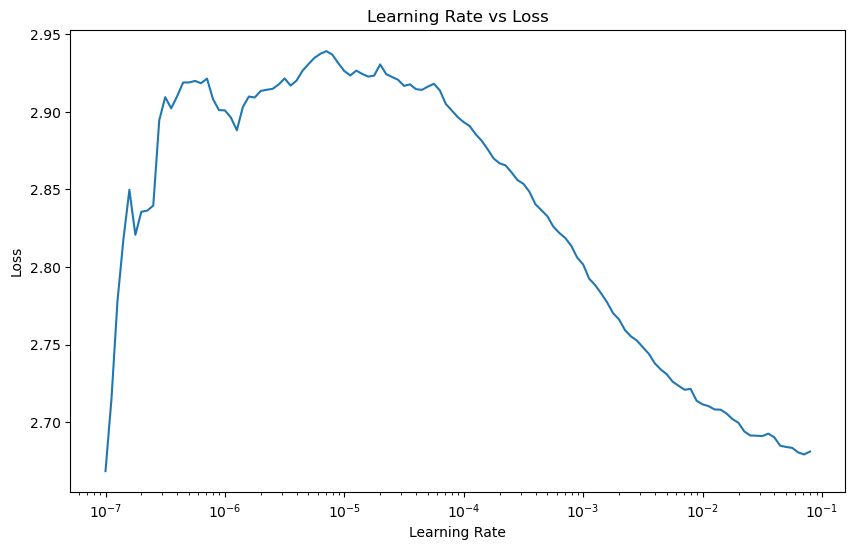

In [62]:


# Custom callback to plot the learning rate vs loss
class LearningRateFinder(Callback):
    def __init__(self, lr_range=(1e-7, 1e-2), num_iter=100):
        super(LearningRateFinder, self).__init__()
        self.lr_range = lr_range
        self.num_iter = num_iter
        self.lr_start = lr_range[0]
        self.lr_end = lr_range[1]
        self.lrs = []
        self.losses = []
        self.batch_index = 0  # Initialize batch index

    def on_batch_end(self, batch, logs=None):
        # Calculate learning rate for this batch
        lr = self.lr_start * (self.lr_end / self.lr_start) ** (self.batch_index / self.num_iter)
        self.lrs.append(lr)
        self.losses.append(logs['loss'])

        # Increase learning rate exponentially for next batch
        new_lr = self.lr_start * (self.lr_end / self.lr_start) ** (self.batch_index / self.num_iter)
        # Update the learning rate using the correct attribute
        self.model.optimizer.learning_rate.assign(new_lr)
        
        # Increment batch_index
        self.batch_index += 1

    def plot_lr_vs_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.lrs, self.losses)
        plt.xscale('log')
        plt.xlabel('Learning Rate')
        plt.ylabel('Loss')
        plt.title('Learning Rate vs Loss')
        plt.savefig('LearningRate.png')
        plt.show()


# Define your model (same as before)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Create the learning rate finder callback
lr_finder = LearningRateFinder(lr_range=(1e-7, 1e-2), num_iter=100)

# Train the model for a few epochs to find the optimal learning rate
history = model.fit(
    augmented_train_data,  # Your training data
    epochs=1,  # Train for a few epochs (you can increase this if needed)
    batch_size=64,
    validation_data=(X_val_normalized, y_val_encoded),  # Your validation data
    callbacks=[lr_finder]
)

# Plot the learning rate vs loss curve
lr_finder.plot_lr_vs_loss()

In [63]:




# Load VGG16 model pre-trained on ImageNet without the top layer (i.e., the classification layer)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

# Freeze the base model so its weights won't be updated during training
base_model.trainable = False

# Build the custom model
model = Sequential([
    # Add the pre-trained base model
    base_model,
    
    # Flatten the output of the base model (convert to a vector)
    Flatten(),
    
    # Add a Dense layer for more flexibility (with dropout for regularization)
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    # Output layer (12 classes, softmax activation for classification)
    Dense(12, activation='softmax')
])

# Step 2: Fine-tune (Unfreeze last few layers of VGG16)
for layer in base_model.layers[-4:]:
    layer.trainable = True  # Unfreeze the last few layers

#unfreeze all layers
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=2.5000e-05), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Add Callbacks 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Step 5: Train the model
history = model.fit(
    augmented_train_data,  # Augmented training data
    epochs=30,# Number of epochs (can increase)
    validation_data=(X_val_normalized, y_val_encoded),  # Validation data
    callbacks=[early_stopping, lr_scheduler]  # Adding callbacks
)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 65s 520ms/step - accuracy: 0.1358 - loss: 2.5564 - val_accuracy: 0.3200 - val_loss: 1.7594 - learning_rate: 2.5000e-05
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 517ms/step - accuracy: 0.3519 - loss: 1.8031 - val_accuracy: 0.5179 - val_loss: 1.3003 - learning_rate: 2.5000e-05
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 61s 514ms/step - accuracy: 0.5163 - loss: 1.4018 - val_accuracy: 0.6042 - val_loss: 1.0958 - learning_rate: 2.5000e-05
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 63s 532ms/step - accuracy: 0.5997 - loss: 1.1484 - val_accuracy: 0.7242 - val_loss: 0.8158 - learning_rate: 2.5000e-05
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 525ms/step - accuracy: 0.6660 - loss: 0.9359 - val_accuracy: 0.7200 - val_loss: 0.7715 - learning_rate: 2.5000e-05
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 520ms/step - accuracy: 0.7054 - loss: 0.8187 - val_accuracy: 0.7074 - val_loss: 0.8196 - learning_rate: 2.5000e-05
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 63s 53

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [64]:
"""
i made a cnn model earlier, the following were the specs. it didn't have
enough computation power, and even with keras tunning i was only able to get 
high 70% or low 80% accuracy :
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 12)                1548      
                                                                 
=================================================================
Total params: 686,156
Trainable params: 685,452
Non-trainable params: 704

the model in its entirety was making my notebook take forever to load, and with
30 epochs , it takes to long to run. 
the following is one of the results : 
Epoch 20/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 304ms/step - accuracy: 0.7124 - loss: 0.8253 
- val_accuracy: 0.7179 - val_loss: 0.7753

once i tweaked the code, by adding leaky relu and smote, i was able to get 

Epoch 15/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8605 - loss: 0.8535 - val_accuracy: 0.8132 
- val_loss: 1.0352 - learning_rate

it took me four days to figure out the VGG16 has more compuation power, and yield
better results .. sad face :( 
"""

"\ni made a cnn model earlier, the following were the specs. it didn't have\nenough computation power, and even with keras tunning i was only able to get \nhigh 70% or low 80% accuracy :\n_________________________________________________________________\n Layer (type)                Output Shape              Param #   \n=================================================================\n conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       \n                                                                 \n batch_normalization_1 (Batc  (None, 62, 62, 32)       128       \n hNormalization)                                                 \n                                                                 \n max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         \n 2D)                                                             \n                                                                 \n dropout_1 (Dropout)         (None, 31, 31, 32)        0         \n        

In [67]:
# Display model architecture summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │         6,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,309,798 (180.47 MB)

 Trainable params: 15,769,932 (60.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,539,866 (120.32 MB)

In [65]:
"""
alot more compuational power, and better results 
"""

'\n\n'

### Visualizing the prediction

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step


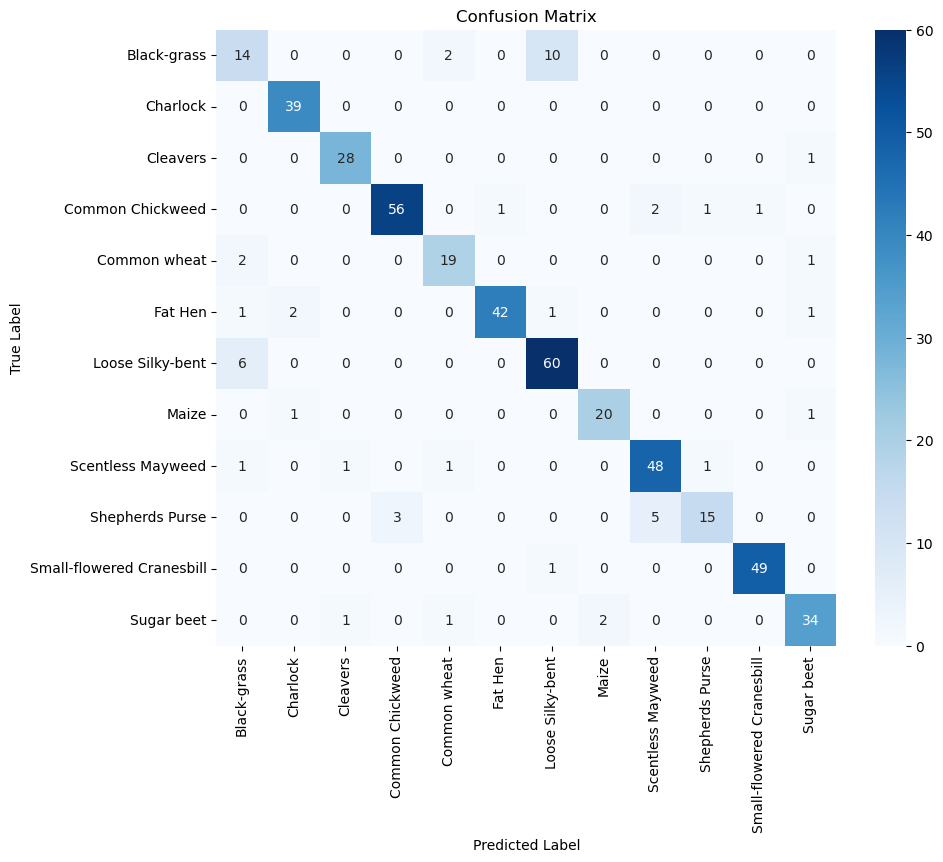

                           precision    recall  f1-score   support

              Black-grass       0.58      0.54      0.56        26
                 Charlock       0.93      1.00      0.96        39
                 Cleavers       0.93      0.97      0.95        29
         Common Chickweed       0.95      0.92      0.93        61
             Common wheat       0.83      0.86      0.84        22
                  Fat Hen       0.98      0.89      0.93        47
         Loose Silky-bent       0.83      0.91      0.87        66
                    Maize       0.91      0.91      0.91        22
        Scentless Mayweed       0.87      0.92      0.90        52
          Shepherds Purse       0.88      0.65      0.75        23
Small-flowered Cranesbill       0.98      0.98      0.98        50
               Sugar beet       0.89      0.89      0.89        38

                 accuracy                           0.89       475
                macro avg       0.88      0.87      0.87    

In [72]:


# Get predicted classes from your model's output (assuming y_pred is the output from model.predict())
y_pred = model.predict(X_test_normalized)  # Use the test set for predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix (y_test_int is already in integer form, not one-hot encoded)
conf_matrix = confusion_matrix(y_test_int, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test_int, y_pred_classes, target_names=label_encoder.classes_))

# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print(f"Accuracy: {accuracy}")


## Actionable Insights and Business Recommendations

In [75]:
from PIL import Image
from tensorflow.keras.preprocessing import image

from io import BytesIO
import ipywidgets as widgets
from IPython.display import display

# Ask the user to upload an image
print("Please upload an image of a plant seedling to classify its species:")

# File upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_widget)

# After the user uploads an image
def upload_and_process():
    if upload_widget.value:
        for name, file_info in upload_widget.value.items():
            # Load the uploaded image
            img = Image.open(BytesIO(file_info['content']))
            img = img.resize((64, 64))  # Resize the image to match the input size
            return img

# Preprocess image function
def preprocess_image(img):
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize if your model requires it
    return img_array


Please upload an image of a plant seedling to classify its species:


FileUpload(value=(), accept='image/*', description='Upload')

In [74]:
# Load and preprocess the image
uploaded_image = upload_and_process()
if uploaded_image:
    preprocessed_img = preprocess_image(uploaded_image)

    # Get predictions from the model
    predictions = model.predict(preprocessed_img)

    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=-1)

    # Assuming you have a list of class names
    class_names = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common Wheat',
                   'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 
                   'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

    # Display the predicted class name
    print(f"Predicted Plant Species: {class_names[predicted_class[0]]}")


*Business Recommendations:

Model Performance Improvement:

The model shows lower F1-scores for Black-grass and Shepherd's Purse, indicating difficulties in correctly identifying these species. This can be addressed by gathering more training data for these specific species .

For Fat Hen, while the model shows high precision, the recall is relatively lower (89%). This suggests the model may miss identifying some instances, leading to false negatives. Increasing recall by fine-tuning the model on this class could improve overall detection accuracy.

Application in Agriculture:

This model could be integrated into an automated crop management system for farmers, allowing them to upload images and accurately identify plant species. This would enhance their ability to monitor crops and detect weeds early, optimizing farming decisions.

Moreover, such a model can potentially contribute to research in plant biology and pharmaceutical innovations, where correctly identifying species is crucial, leading to discoveries of new plant-based medicines.

Model Comparison & Transfer Learning Benefits:

The pre-trained VGG16 model has demonstrated superior performance in comparison to the custom CNN model, with greater computational efficiency and consistency. Its ability to leverage prior knowledge from ImageNet training makes it a powerful tool in image classification tasks, saving both time and resources.

Transfer learning is highly effective, providing a major efficiency boost for tasks requiring significant computational resources. Utilizing pre-trained models can significantly reduce development time while improving accuracy, making it a valuable approach for future projects.

Actionable Insights:

Enhance Data Collection:

Focus on collecting additional data for underperforming species, specifically Black-grass and Shepherd's Purse, to improve model performance and avoid misclassifications.

Model Deployment:

Implement this model as a tool for precision agriculture, helping farmers identify plant species and optimize crop health management through real-time classification.

Explore Transfer Learning Opportunities:

For future projects, prioritize transfer learning to enhance model performance while reducing training time. This will allow for faster, more accurate deployments, especially in time-sensitive environments like agriculture and medicine.



In [76]:
"""



Transfer learning is very eye opening, i would have done this in fewer days, 
would have less gray hairs, more power with less work . Im happy i got to ,
experience,the difference for myself. 
"""

'\n\n\n\nTransfer learning is very eye opening, i would have done this in fewer days, \nwould have less gray hairs, more power with less work . Im happy i got to ,\nexperience,the difference for myself. \n'

_____